## Credit Card Case Study

### Importing Libraries & Data

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
spend = pd.read_csv('spend.csv')
spend.head(1)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.8


In [3]:
spend = spend.rename(columns = {'Amount':'Spend_Amount'})
spend.head(1)

,Sl No:,Customer,Month,Type,Spend_Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.8


In [4]:
repayment = pd.read_csv('Repayment.csv')
repayment.head(1)

,SL No:,Customer,Month,Repayment_Amount
0,NaN,A1,12-Jan-04,495414.75


In [5]:
customer_acqusition = pd.read_csv('Customer Acqusition.csv')
customer_acqusition.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed


In [6]:
final_table = pd.merge(spend,repayment,left_on = ['Customer','Month'],right_on=['Customer','Month'],how='left')

In [7]:
final_tab = pd.merge(final_table,customer_acqusition,left_on ='Customer',right_on='Customer',how='left')
final_tab = final_tab.loc[:,['Customer','Type','Repayment_Amount','Spend_Amount','Age','City','Product','Limit','Company','Segment','Month']]
final_tab = final_tab.rename(columns = {'Month':'Date'})
final_tab['Date'] = pd.to_datetime(final_tab['Date'],format='%d-%b-%y')
final_tab.head(1)

,Customer,Type,Repayment_Amount,Spend_Amount,Age,City,Product,Limit,Company,Segment,Date
0,A1,JEWELLERY,495414.75,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12


### 1. In the above dataset,

### a. In case age is less than 18, replace it with mean of age values.

In [10]:
final_tab.loc[final_tab['Age'] < 18, 'Age'] = final_tab['Age'].mean()

C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\681325039.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43.97007042253521' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  final_tab.loc[final_tab['Age'] < 18, 'Age'] = final_tab['Age'].mean()


###  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [20]:
final_tab.loc[final_tab['Spend_Amount'] > final_tab['Limit'],'Spend_Amount'] = 0.5 * final_tab['Limit']

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [23]:
final_tab.loc[final_tab['Repayment_Amount'] > final_tab['Limit'],'Repayment_Amount'] = final_tab['Limit']

### 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [27]:
final_tab.Customer.nunique()

100

#### b. How many distinct categories exist?

In [30]:
final_tab.Type.unique()

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'BIKE', 'AUTO', 'SHOPPING', 'AIR TICKET', 'BUS TICKET',
       'TRAIN TICKET', 'RENTAL', 'MOVIE TICKET'], dtype=object)

#### c. What is the average monthly spend by customers?

In [33]:
final_tab['Month'] = final_tab.Date.dt.month

In [93]:
avg_monthly_spend_by_customers = final_tab.groupby(['Month','Customer']).Spend_Amount.mean().reset_index()
avg_monthly_spend_by_customers = avg_monthly_spend_by_customers.rename(columns = {'Spend_Amount':'Avg_Spend_Amt'})
avg_monthly_spend_by_customers

,Month,Customer,Avg_Spend_Amt
0,1,A1,355911.259000
1,1,A10,161144.326667
2,1,A100,50000.000000
3,1,A11,130298.903333
4,1,A12,374058.145000
5,1,A13,302861.730000
6,1,A14,360003.606667
7,1,A15,154755.972000
8,1,A16,163363.098000
9,1,A17,125232.798333


####  d. What is the average monthly repayment by customers?

In [95]:
avg_monthly_repayment_by_customers = final_tab.groupby(['Month','Customer']).Repayment_Amount.mean().reset_index()
avg_monthly_repayment_by_customers = avg_monthly_repayment_by_customers.rename(columns = {'Repayment_Amount':'Avg_Repayment_Amt'})
avg_monthly_repayment_by_customers

,Month,Customer,Avg_Repayment_Amt
0,1,A1,369122.298000
1,1,A10,397059.170000
2,1,A100,69551.190000
3,1,A11,458474.930000
4,1,A12,155369.656667
5,1,A13,396192.950000
6,1,A14,189133.305000
7,1,A15,328532.330000
8,1,A16,278486.992000
9,1,A17,176791.856667


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [41]:
final_tab['Profit'] = (final_tab.Repayment_Amount - final_tab.Spend_Amount ) #Creating Profit Column
df1 = final_tab[final_tab.Profit > 0] #Filtering positive profit
df1 = df1.groupby('Month').Profit.sum().reset_index() #monthly profit
df1['Profit_Interest'] = (df1.Profit*0.029) #profit for bank for each month as Profit_Interest
df1 = df1.loc[:,['Month','Profit_Interest']]
df1

,Month,Profit_Interest
0,1,677814.11711
1,2,324293.61998
2,3,177609.11264
3,4,82555.43419
4,5,210492.79409
5,6,23986.55830
6,7,27938.34161
7,8,15287.12032
8,9,24369.37976
9,10,22470.91796


#### f. What are the top 5 product types?

In [44]:
df2 = final_tab.groupby('Type').Type.count()
Top5_product_types = df2.sort_values(ascending = False).head(5)
Top5_product_types

Type
PETRO           229
CAMERA          201
FOOD            181
AIR TICKET      159
TRAIN TICKET    144
Name: Type, dtype: int64

#### g. Which city is having maximum spend?

In [47]:
max_spend_city = final_tab.groupby('City').Spend_Amount.sum().sort_values(ascending = False).head(1)
max_spend_city

City
COCHIN    52080571.7
Name: Spend_Amount, dtype: float64

#### h. Which age group is spending more money?

In [50]:
final_tab['Age_Group'] = pd.cut(final_tab['Age'], bins= 5,labels = ['18-31','31-43','43-55','55-67','67-79'])
age_group_spending_more_money = final_tab.groupby('Age_Group').Spend_Amount.sum().sort_values(ascending = False).head(1)
age_group_spending_more_money 

C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\431203459.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending_more_money = final_tab.groupby('Age_Group').Spend_Amount.sum().sort_values(ascending = False).head(1)


Age_Group
43-55    80737505.37
Name: Spend_Amount, dtype: float64

#### i.Who are the top 10 customers in terms of repayment?

In [53]:
df4 = final_tab.groupby('Customer').Repayment_Amount.sum().sort_values(ascending = False).head(10)
df4

Customer
A60    10428573.54
A61     8617285.78
A44     8227149.65
A43     7963202.15
A45     7075094.55
A13     6479204.24
A38     6404899.90
A42     6181774.14
A41     5667620.30
A39     5534957.87
Name: Repayment_Amount, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [101]:
final_tab['Year'] = final_tab['Date'].dt.year
df8 = final_tab.groupby(['City', 'Type', 'Year']).Spend_Amount.sum().reset_index()
df8

,City,Type,Year,Spend_Amount
0,BANGALORE,AIR TICKET,2004,875244.95
1,BANGALORE,AIR TICKET,2005,1972296.92
2,BANGALORE,AIR TICKET,2006,1335922.44
3,BANGALORE,AUTO,2005,141539.79
4,BANGALORE,AUTO,2006,822785.32
5,BANGALORE,BIKE,2005,276499.83
6,BANGALORE,BIKE,2006,602037.91
7,BANGALORE,BUS TICKET,2004,2550499.11
8,BANGALORE,BUS TICKET,2005,1312655.06
9,BANGALORE,BUS TICKET,2006,582952.69


<Axes: xlabel='Year', ylabel='City-Product'>

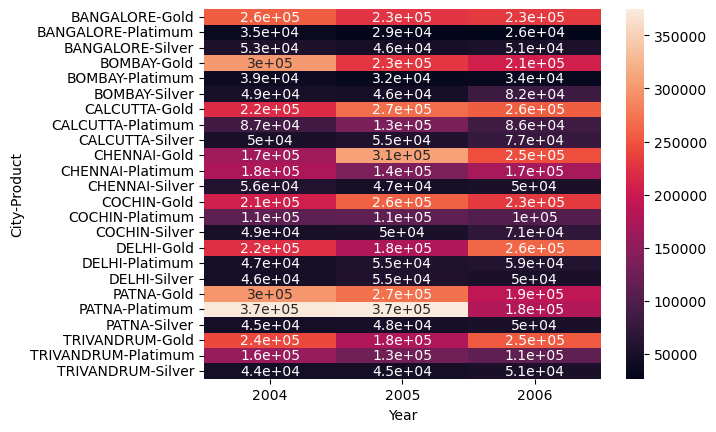

In [58]:
sns.heatmap(pd.pivot_table(data = final_tab,index=['City', 'Product'], columns='Year', values='Spend_Amount', fill_value=0),annot = True)

### 4. Create graphs for

#### a.Monthly comparison of total spends, city wise

In [99]:
df11 = final_tab.groupby(['City', 'Month']).Spend_Amount.sum().reset_index()
df11

,City,Month,Spend_Amount
0,BANGALORE,1,13208864.32
1,BANGALORE,2,8311749.01
2,BANGALORE,3,5989615.14
3,BANGALORE,4,4262980.98
4,BANGALORE,5,6407515.11
5,BANGALORE,6,1330685.90
6,BANGALORE,7,2228217.69
7,BANGALORE,8,695061.95
8,BANGALORE,9,703018.28
9,BANGALORE,10,1091602.61


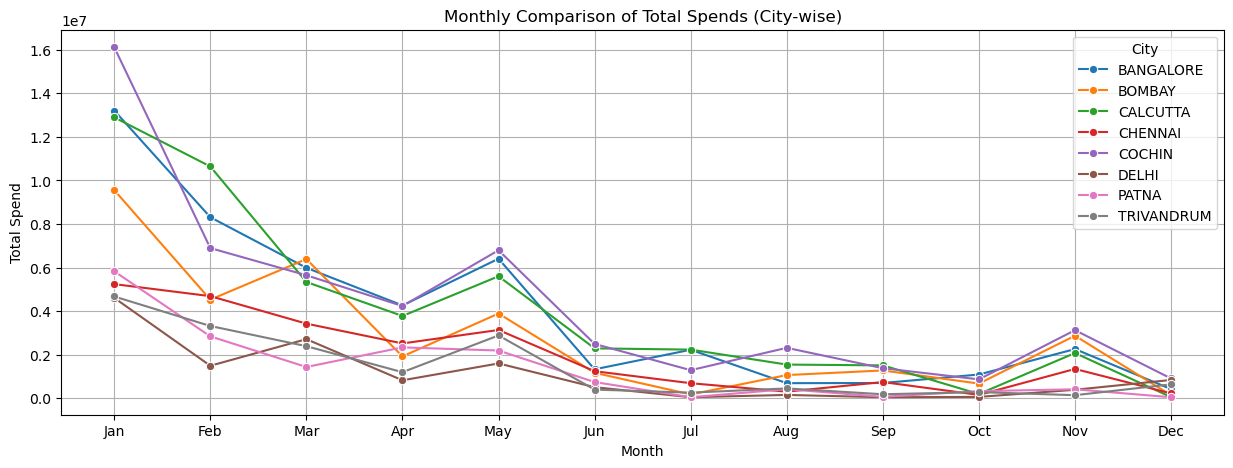

In [64]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Month', y='Spend_Amount', hue='City',data = df11,marker='o')
plt.title('Monthly Comparison of Total Spends (City-wise)')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='City')
plt.show()

#### b.Comparison of yearly spend on air tickets

In [67]:
air_tickets_df = final_tab[final_tab['Type'] == 'AIR TICKET']
yearly_spend = air_tickets_df.groupby('Year')['Spend_Amount'].sum()
yearly_spend

Year
2004     5813169.84
2005    10857774.22
2006     5272869.54
Name: Spend_Amount, dtype: float64

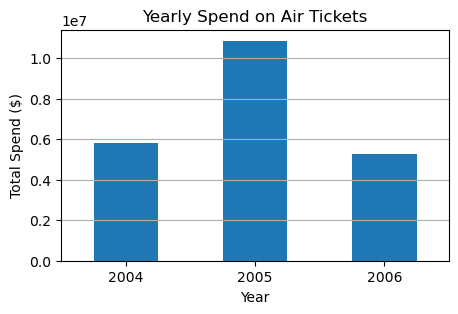

In [69]:
plt.figure(figsize=(5,3))
yearly_spend.plot(kind='bar')
plt.title('Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

####  c. Comparison of monthly spend for each product (look for any seasonality  that exists in terms of spend)

In [97]:
monthly_spend = final_tab.groupby(['Type', 'Month'])['Spend_Amount'].sum().reset_index()
monthly_spend

,Type,Month,Spend_Amount
0,AIR TICKET,1,5289688.41
1,AIR TICKET,2,4299674.06
2,AIR TICKET,3,1247589.11
3,AIR TICKET,4,1066444.18
4,AIR TICKET,5,4245399.89
5,AIR TICKET,6,1889615.89
6,AIR TICKET,7,955502.70
7,AIR TICKET,8,1017557.08
8,AIR TICKET,9,1026664.12
9,AIR TICKET,10,50001.50


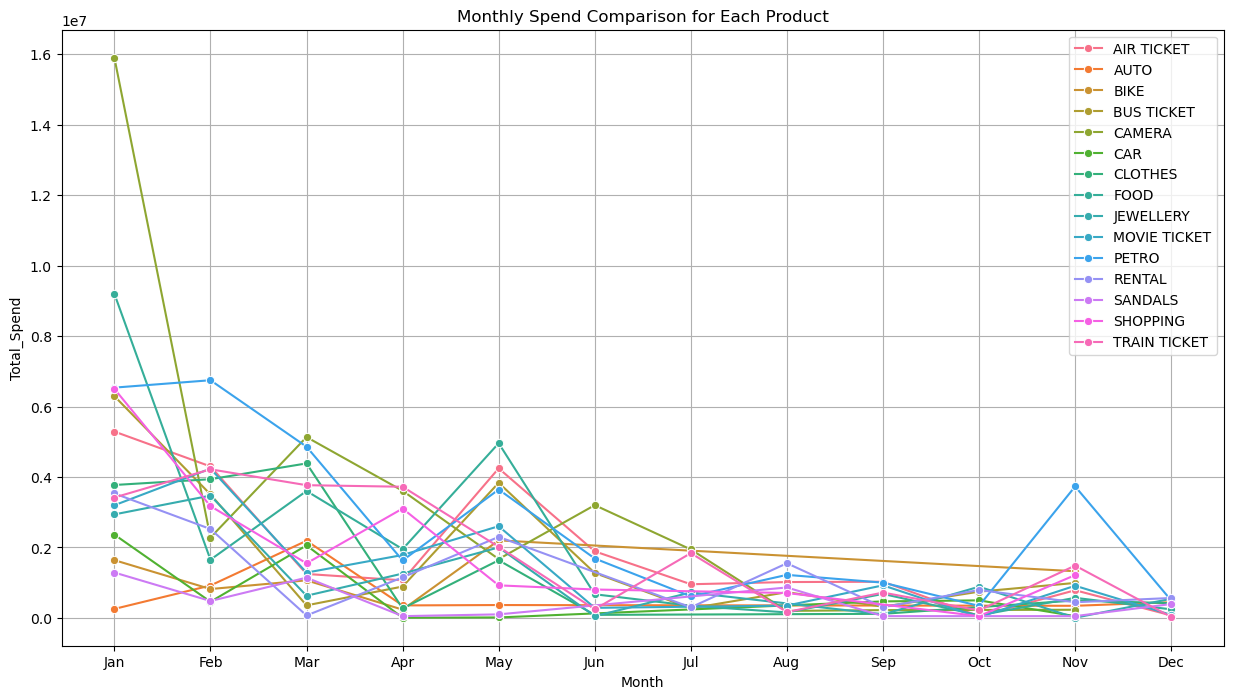

In [76]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Month', y='Spend_Amount',hue='Type',data=monthly_spend, marker='o')
plt.title('Monthly Spend Comparison for Each Product')
plt.xlabel('Month')
plt.ylabel('Total_Spend')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Type')
plt.legend(loc='upper right')
plt.show()

#### 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be abl 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and te 
function should automatically take these inputs while identifying the top 10 customers.

In [79]:
def top_customers_analysis(df, product, time_period):
    # Filter by product
    df_filtered = df[df['Product'] == product]

    # Determine the time period (yearly or monthly)
    if time_period == 'yearly':
        df_filtered['Period'] = df_filtered['Date'].dt.year
    elif time_period == 'monthly':
        df_filtered['Period'] = df_filtered['Date'].dt.month

    # Group by City, Period, and Customer, summing up Repayment_Amount
    grouped = df_filtered.groupby(['City', 'Period', 'Customer'])['Repayment_Amount'].sum().reset_index()

    # Sort by Repayment_Amount within each City and Period group
    grouped_sorted = grouped.groupby(['City', 'Period']).apply(lambda x: x.nlargest(10, 'Repayment_Amount')).reset_index(drop=True)

    # Prepare results as a dictionary of DataFrames for each city
    results = {}
    for city in grouped_sorted['City'].unique():
        results[city] = grouped_sorted[grouped_sorted['City'] == city]

    return results

In [81]:
product_type = 'Gold' 
time_period = 'yearly'  

top_customers = top_customers_analysis(final_tab, product_type, time_period)
# Print the top 10 customers for each city
for city, df_top_customers in top_customers.items():
    print(f"Top 10 customers in {city} for {product_type} ({time_period}):")
    print(df_top_customers[['Customer', 'Period', 'Repayment_Amount']])
    print()

Top 10 customers in BANGALORE for Gold (yearly):
   Customer  Period  Repayment_Amount
0        A1    2004        3643214.53
1       A43    2004        3400070.05
2       A13    2004        1584771.80
3       A14    2004        1210195.06
4       A30    2004        1077064.48
5       A43    2005        3022902.19
6       A13    2005        2969787.96
7       A14    2005        2272262.77
8        A1    2005        1506620.71
9       A30    2005              0.00
10      A63    2005              0.00
11      A13    2006        1924644.48
12      A14    2006        1656584.49
13      A43    2006        1540229.91
14      A30    2006         760830.36
15      A92    2006         459105.69
16      A63    2006         211117.12
17      A81    2006         207780.32
18      A88    2006         146821.30
19       A1    2006          79849.19

Top 10 customers in BOMBAY for Gold (yearly):
   Customer  Period  Repayment_Amount
20      A42    2004        3747332.26
21      A17    2004        172

C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\2599354642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Period'] = df_filtered['Date'].dt.year
C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\2599354642.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_sorted = grouped.groupby(['City', 'Period']).apply(lambda x: x.nlargest(10, 'Repayment_Amount')).reset_index(drop=True)


In [83]:
product_type = 'Silver'  
time_period = 'monthly'  

top_customers = top_customers_analysis(final_tab, product_type, time_period)

# Print the top 10 customers for each city
for city, df_top_customers in top_customers.items():
    print(f"Top 10 customers in {city} for {product_type} ({time_period}):")
    print(df_top_customers[['Customer', 'Period', 'Repayment_Amount']])
    print()

Top 10 customers in BANGALORE for Silver (monthly):
   Customer  Period  Repayment_Amount
0       A23       1         700007.00
1       A18       1         590352.08
2       A59       1         376548.50
3       A76       2         265619.05
4       A72       2         100000.00
5       A77       2           3159.62
6       A18       2              0.00
7       A23       2              0.00
8       A59       2              0.00
9       A18       3         300000.00
10      A59       3         100003.00
11      A23       3              0.00
12      A23       4         105080.59
13      A59       4              0.00
14      A59       5         100003.00
15      A18       5              0.00
16      A23       5              0.00
17      A59       6         200006.00
18      A23       6              0.00
19      A59       7         100003.00
20      A23       7         100001.00
21      A18       7              0.00
22      A23       8              0.00
23      A18       9              0.0

C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\2599354642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Period'] = df_filtered['Date'].dt.month
C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\2599354642.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_sorted = grouped.groupby(['City', 'Period']).apply(lambda x: x.nlargest(10, 'Repayment_Amount')).reset_index(drop=True)


In [85]:
product_type = 'Platimum'  
time_period = 'yearly'  

top_customers = top_customers_analysis(final_tab, product_type, time_period)

# Print the top 10 customers for each city
for city, df_top_customers in top_customers.items():
    print(f"Top 10 customers in {city} for {product_type} ({time_period}):")
    print(df_top_customers[['Customer', 'Period', 'Repayment_Amount']])
    print()

Top 10 customers in BANGALORE for Platimum (yearly):
   Customer  Period  Repayment_Amount
0       A37    2004        1300026.16
1        A5    2004          60012.00
2       A19    2004          30000.00
3       A52    2004              0.00
4       A37    2005         709467.82
5       A52    2005         400008.00
6       A19    2005          30000.00
7        A5    2005          20004.00
8       A52    2006         200004.00
9       A37    2006         100003.00
10       A5    2006          20004.00
11      A19    2006          10000.00

Top 10 customers in BOMBAY for Platimum (yearly):
   Customer  Period  Repayment_Amount
12      A36    2004        1317394.80
13      A51    2004         100001.00
14       A4    2004          20002.00
15      A33    2004           2273.98
16      A36    2005         300006.00
17      A51    2005         257994.40
18       A4    2005          20002.00
19      A71    2005          10002.00
20      A70    2005          10001.00
21      A33    2005   

C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\2599354642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Period'] = df_filtered['Date'].dt.year
C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\2599354642.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_sorted = grouped.groupby(['City', 'Period']).apply(lambda x: x.nlargest(10, 'Repayment_Amount')).reset_index(drop=True)


In [87]:
product_type = 'Gold' 
time_period = 'monthly'  

top_customers = top_customers_analysis(final_tab, product_type, time_period)
# Print the top 10 customers for each city
for city, df_top_customers in top_customers.items():
    print(f"Top 10 customers in {city} for {product_type} ({time_period}):")
    print(df_top_customers[['Customer', 'Period', 'Repayment_Amount']])
    print()

Top 10 customers in BANGALORE for Gold (monthly):
   Customer  Period  Repayment_Amount
0        A1       1        3691222.98
1       A43       1        3400070.05
2       A13       1        1584771.80
3       A14       1         756533.22
4       A30       1         580309.64
5       A13       2        3103175.79
6       A14       2        2262375.03
7       A43       2        1248059.20
8        A1       2        1056512.48
9       A30       2          67056.51
10      A63       2              0.00
11      A43       3        1540229.91
12      A14       3         782768.78
13      A13       3         575551.13
14      A81       3         207780.32
15      A88       3         146821.30
16      A30       3              0.00
17      A92       4         459105.69
18      A14       4         453661.84
19      A13       4         160898.98
20       A1       4          79849.19
21      A30       4              0.00
22      A43       4              0.00
23      A43       5        1358982.72


C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\2599354642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Period'] = df_filtered['Date'].dt.month
C:\Users\arpit\AppData\Local\Temp\ipykernel_7876\2599354642.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_sorted = grouped.groupby(['City', 'Period']).apply(lambda x: x.nlargest(10, 'Repayment_Amount')).reset_index(drop=True)
